# scikit-learn 中的多项式回归和Pipeline

In [35]:
import numpy as np
import matplotlib.pyplot as plt 


In [36]:
x = np.random.uniform(-3,3,size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size = 100)

In [37]:
from sklearn.preprocessing import PolynomialFeatures 
##使用sklearn.preprocessing.PolynomialFeatures来进行特征的构造。
##它是使用多项式的方法来进行的，如果有a，b两个特征，
##那么它的2次多项式为（1,a,b,a^2,ab, b^2），
##这个多项式的形式是使用poly的效果。

In [38]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X) ###计算输出功能的数量
x2 = poly.transform(X)###将数据转换为多项式要素

In [39]:
x2.shape

(100, 3)

In [40]:
x2[:5,:]

array([[ 1.        , -2.08139317,  4.33219752],
       [ 1.        ,  2.96285334,  8.77849993],
       [ 1.        ,  0.73448323,  0.53946562],
       [ 1.        , -2.7206042 ,  7.40168722],
       [ 1.        ,  1.03890901,  1.07933193]])

In [41]:
X[:5,:]

array([[-2.08139317],
       [ 2.96285334],
       [ 0.73448323],
       [-2.7206042 ],
       [ 1.03890901]])

In [42]:
from sklearn.linear_model import LinearRegression  #### 使用线性回归来试试
lin_reg2 = LinearRegression()
lin_reg2.fit(x2,y)
y_predict2 = lin_reg2.predict(x2)

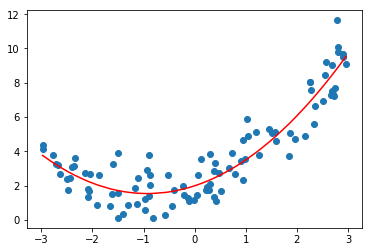

In [43]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [44]:
lin_reg2.coef_

array([0.        , 0.97946954, 0.52917022])

In [45]:
lin_reg2.intercept_

1.9933212115539112

# Pipeline

In [46]:
x = np.random.uniform(-3,3,size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size = 100)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [50]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
                    ])

In [54]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

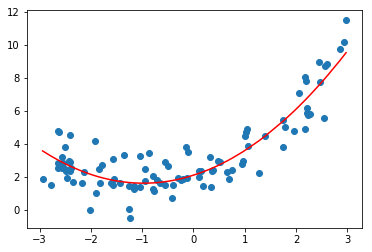

In [55]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()